<a href="https://colab.research.google.com/github/veillette/jupyterNotebooks/blob/main/Advanced%20Lab/CurveFittingForDiffractionPattern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- - - -
# Curve Fitting Tutorial for Diffraction Pattern

- - - -

Martin Veillette @ Berea College

- - - -


# Best fit function

The intensity function as a function of angle $\theta$ is predicted to follow
$$ I(\theta) =I_0 \left[ \frac{\sin{\left(\beta \theta \right)}}{\beta \theta} \right]^2  \times \left[ \cos{\left(\alpha \theta\right)} \right]^2 $$

where $$\beta= \frac{\pi D}{\lambda},$$ $$\alpha= \frac{\pi d}{\lambda}.$$ $D$ is the width of a slit and $d$ is the separation of the two slits

# Experimental Complications


The angle $\theta$ in the above formula is measured from the center of the two slits. In practice, this center position is difficult to establish. In addition, the intensity is measured as a function of the distance rather than angle
The angle is given by
$$ \tan(\theta) = \frac{x-x_o}{L} $$
where $x_o$ is the center position and $L$ is the distance between the two slits and the screen.
Using the small angle approximation,
$$ \theta = \frac{x-x_o}{L} $$


An additional complication is that the photo diode is immersed in ambient light and therefore the intensity does not go to zero at large distance.

As a result, the intensity can be described as

$$ I(x) =I_0 \left[ \frac{\sin{\left(\frac{\beta }{L} (x-x_0) \right)}}{\frac{\beta}{L} (x-x_0)} \right]^2  \times \left[ \cos{\left( \frac{\alpha }{L} (x-x_0)\right)} \right]^2 +I_{\textrm{background}}$$


In [67]:
# import modules
import numpy as np
from numpy import array, arange, pi, exp, sin, cos, polyfit, poly1d, linspace, zeros, flipud, random
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from scipy.optimize import fmin
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16,12)
mpl.rcParams['font.size'] = 14
mpl.rcParams['legend.fontsize'] = 14

In [68]:
π=pi

def β(λ,D,θ):
  return (π/λ)*D*sin(θ)

def α(λ,d,θ):
  return (π/λ)*d*sin(θ)

In [69]:
def interferenceFactor(α):
  return (2*cos(α))**2

In [70]:
def diffractionFactor(β):
  return (sin(β)/β)**2

In [71]:
def intensityPattern(θ,λ,d,D):
    return diffractionFactor(β(λ,D,θ))*interferenceFactor(α(λ,d,θ))

In [72]:
θ_b=0.002
θ=np.linspace(-θ_b,θ_b,1000)  # range of angles in radians

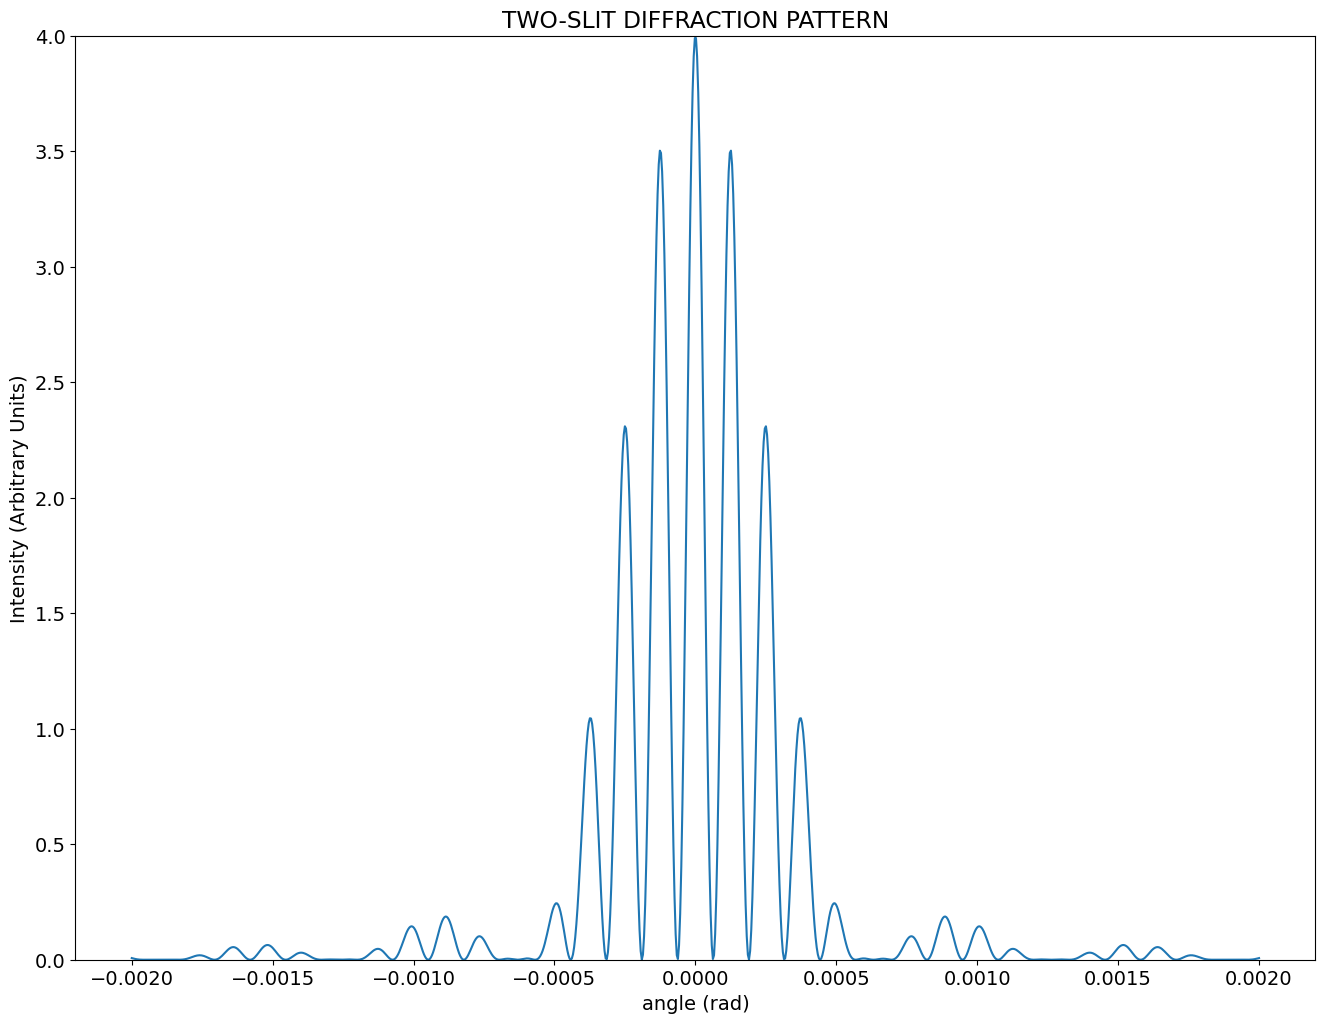

In [73]:
λ=6.32E-7 ## wavelength in (m)
d=0.005 ## distance between slits in (m)
D=0.001 ## width of slits in (m)
plt.plot(θ,intensityPattern(θ,λ,d,D))
plt.ylim(0,4)
plt.xlabel('angle (rad)')
plt.ylabel('Intensity (Arbitrary Units)')
plt.title("TWO-SLIT DIFFRACTION PATTERN")
plt.show()

## Least squares regression

Consider some data points (X,Y)


We want to set the values of 'u' such that $\chi$ is as small as possible.The goal of the least square regression is to find the parameters of 'u' such that it minimizes the square of the deviation, i.e.
$$ \chi(u) = \sum_{x_i} \left( y_i - \textrm{predictedFunction}(u,x_i) \right)^2 $$

We want to minimize χ.



Text(0, 0.5, 'Intensity (Arbitrary Units)')

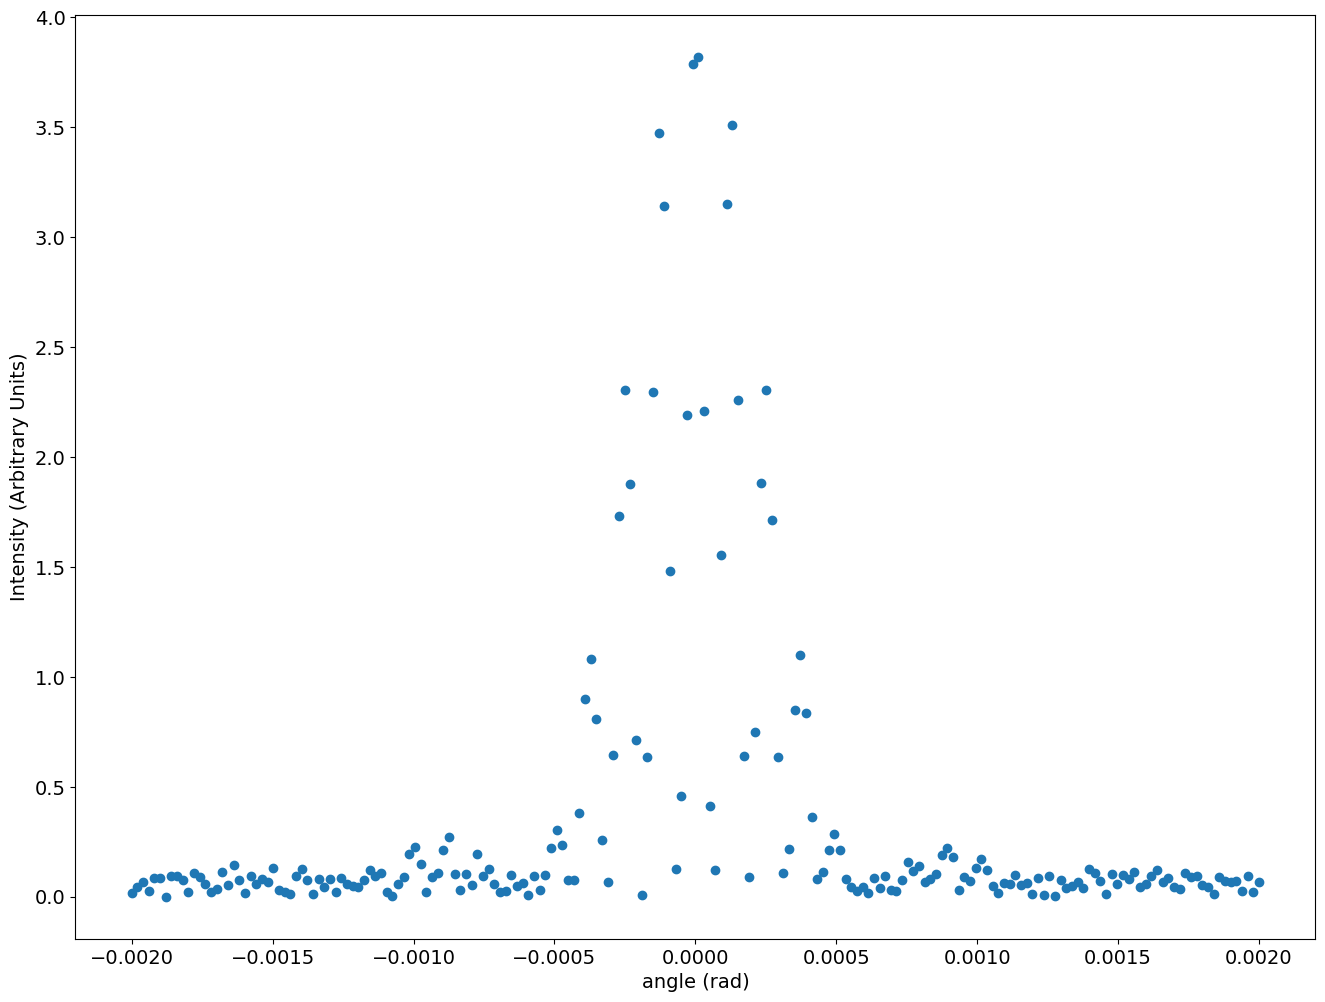

In [88]:
# Sample data
λ=6.32E-7 ## wavelength in (m)
d=0.005 ## distance between slits in (m)
D=0.001 ## width of slits in (m)

θ_b=0.002
θ=np.linspace(-θ_b,θ_b,200)  # range of angles in radians
noise= random.rand(len(θ));
intensity = intensityPattern(θ,λ,d,D) + noise*0.1;
plt.scatter(θ,intensity)
plt.xlabel('angle (rad)')
plt.ylabel('Intensity (Arbitrary Units)')

In [83]:
# Define the exponentially decaying function that will be used for the least square regression.
# Note the order of the parameters in the function. The optimized values from the curve fit will be in the same order as defined in this function
def experimentalIntensityPattern(θ,amplitude,d,D,background):
    λ=6.32E-7 ## wavelength in (m)
    return amplitude*diffractionFactor(β(λ,D,θ))*interferenceFactor(α(λ,d,θ))+ background

In [85]:
# give some initial values to our parameters
initial_params= [1, 0.005, 0.002, 1]

# Perform the least squares fit
params, covariance = curve_fit(experimentalIntensityPattern, θ, intensity, p0=initial_params )

# Extract the optimized parameters
amplitude_opt, d_opt, D_opt, background_opt = params

# Calculate the standard deviation of the parameters
amplitude_std_dev, d_std_dev, D_std_dev, background_std_dev = np.sqrt(np.diag(covariance))

# Display the optimized parameters and their standard deviations
print("Optimized parameters:")
print(f"a = {amplitude_opt} ± {amplitude_std_dev}")
print(f"b = {d_opt} ± {d_std_dev}")
print(f"c = {D_opt} ± {D_std_dev}")
print(f"b = {background_opt} ± {background_std_dev}")

Optimized parameters:
a = 1.0035426481845746 ± 0.0028501321100579896
b = 0.004995049391893723 ± 2.4367370596018683e-06
c = 0.0010017264057311662 ± 2.9220758972101816e-06
b = 0.053599446028875335 ± 0.0021019341800852043


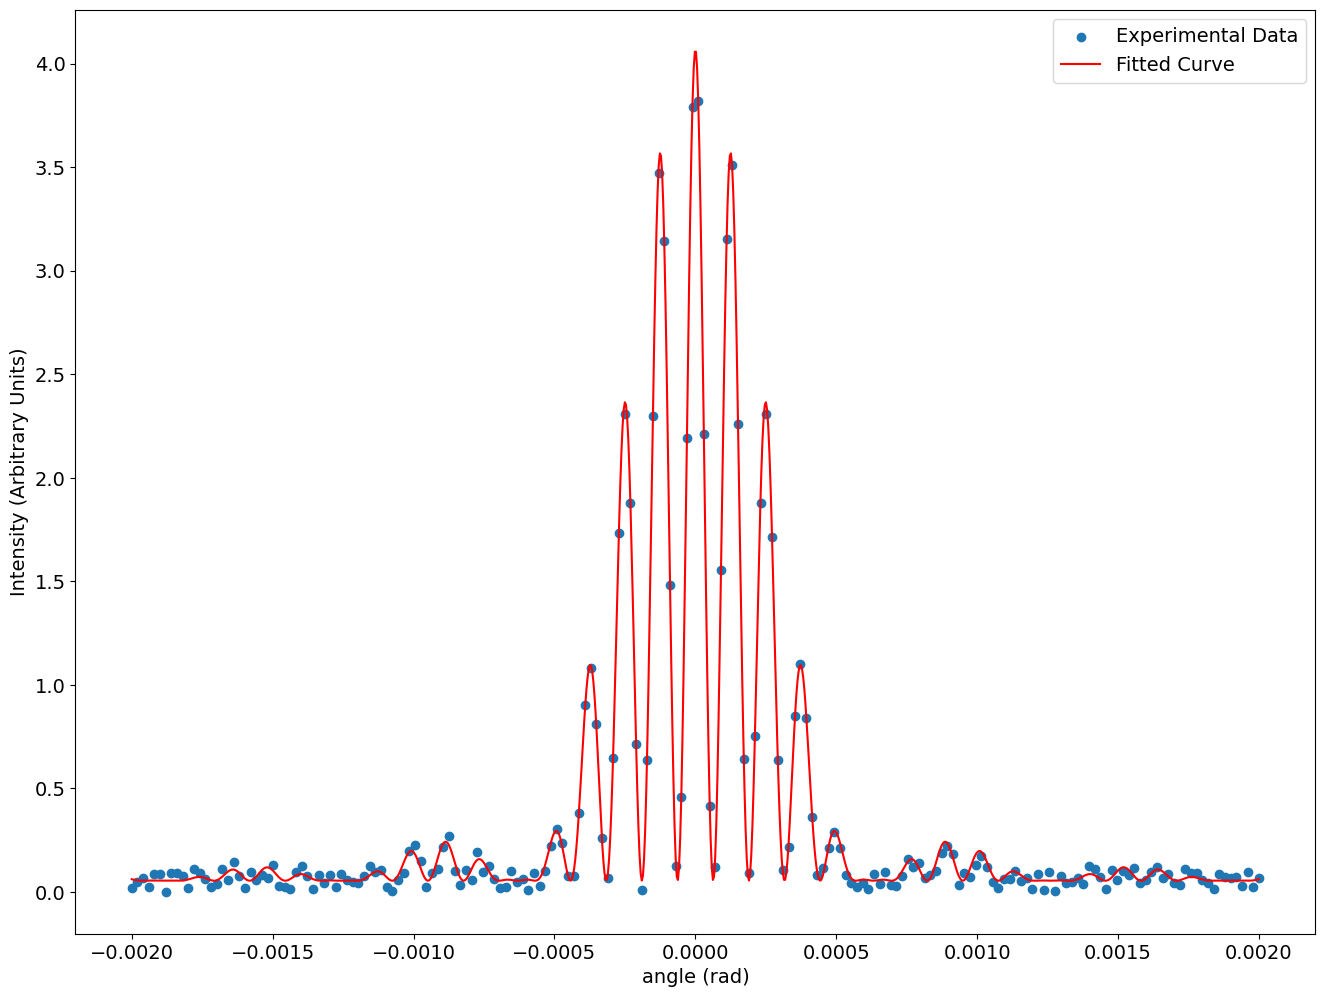

In [89]:
# Plot the original data and the fitted curve
plt.scatter(θ, intensity, label='Experimental Data')
θ_fit = np.linspace(θ.min(), θ.max(), 1000)
y_fit = experimentalIntensityPattern(θ_fit, amplitude_opt, d_opt, D_opt, background_opt)
plt.plot(θ_fit, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('angle (rad)')
plt.ylabel('Intensity (Arbitrary Units)')
plt.legend()
plt.show()

In [79]:
θ.max()

0.002

## Curve Fitting for Diffraction and Interference from two-Slits

In [80]:
import pandas

# the data in the folder content may get erased by colab
df = pandas.read_excel('ExcelFakeDataInterference.xlsx', sheet_name='Sheet1')

FileNotFoundError: ignored

In [ ]:
df.iloc[:,:]

In [ ]:
df.plot(x='X',y='I');

In [ ]:
unpackedArray = df.values